## Human Resources Analytics Dataset

In [2]:
import pandas as pd
hr = pd.read_csv('../Cases/human-resources-analytics/HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [7]:
X, y = hr.drop(columns=['left']), hr['left']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore').set_output(transform='pandas')

ct = make_column_transformer(
        (ohe, make_column_selector(dtype_include=object)),
        ('passthrough', make_column_selector(dtype_exclude=object)),
        verbose_feature_names_out=False).set_output(transform='pandas')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [29]:
from tqdm import tqdm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score 
import numpy as np
n_features = np.arange(2,10)
scores = []
for i in tqdm(range(len(n_features))):
    rf = RandomForestClassifier(random_state=24, max_features=n_features[i])
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred, pos_label=1))

print('Best no of max_features : ',n_features[np.argmax(scores)])
print('Best F1 Score : ', np.max(scores))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.28it/s]

Best no of max_features :  6
Best F1 Score :  0.9771863117870723


### Building the model with best HyperParameters

In [44]:
X_train, y_train = ct.fit_transform(X), y

X_test = pd.read_csv('../Cases/human-resources-analytics/tst_hr.csv')
X_test = ct.fit(X_test)

best_rf = RandomForestClassifier(random_state=24, max_features=6)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=6, random_state=24)

In [45]:
df_imp = pd.DataFrame({'Importance': best_rf.feature_importances_, 'Column': list(X_train.columns)})
df_imp.sort_values('Importance', ascending=False, inplace=True)

Text(0, 0.5, 'Importances')

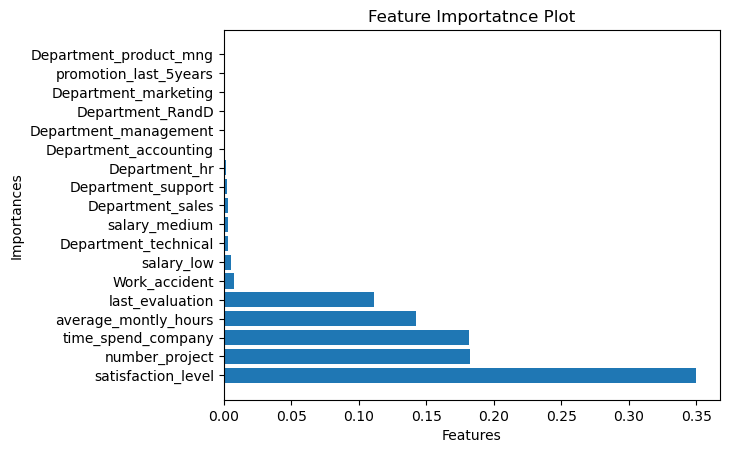

In [46]:
import matplotlib.pyplot as plt
plt.barh(df_imp['Column'], df_imp['Importance'])
plt.title('Feature Importatnce Plot')
plt.xlabel('Features')
plt.ylabel('Importances')

## Medical Cost Personal Insurance

In [47]:
insurance = pd.read_csv('../Cases/Medical Cost Personal/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
X, y = insurance.drop(columns=['charges']), insurance['charges']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore').set_output(transform='pandas')

ct = make_column_transformer(
        (ohe, make_column_selector(dtype_include=object)),
        ('passthrough', make_column_selector(dtype_exclude=object)),
        verbose_feature_names_out=False).set_output(transform='pandas')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [53]:
from tqdm import tqdm 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
import numpy as np
n_features = np.arange(2,8)
scores = []
for i in tqdm(range(len(n_features))):
    rf = RandomForestRegressor(random_state=24, max_features=n_features[i])
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

print('Best no of max_features : ',n_features[np.argmax(scores)])
print('Best r2 Score : ', np.max(scores))

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.86it/s]

Best no of max_features :  5
Best r2 Score :  0.8652503097081756


### Building the best model for Inferencing

In [68]:
X_train , y_train = ct.fit_transform(X), y
X_test = pd.read_csv('../Cases/Medical Cost Personal/tst_insure.csv')

X_test = ct.transform(X_test)

In [69]:
best_rf = RandomForestRegressor(random_state=24, max_features=n_features[i])
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

In [70]:
X_test['charges'] = y_pred
X_test

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0.0,1.0,0.0,0.0,1.0,19,27.900,0,17001.865413
1,1.0,0.0,0.0,1.0,0.0,18,33.770,1,2247.189344
2,1.0,0.0,0.0,1.0,0.0,28,33.000,3,5245.019774
3,1.0,0.0,1.0,0.0,0.0,33,22.705,0,14438.459417
4,0.0,0.0,1.0,0.0,0.0,37,23.370,2,7031.726237
...,...,...,...,...,...,...,...,...,...
83,1.0,0.0,1.0,0.0,0.0,60,24.320,1,14845.030312
84,0.0,0.0,1.0,0.0,0.0,51,36.670,2,12259.448536
85,0.0,0.0,1.0,0.0,0.0,58,33.440,0,12164.362827
86,1.0,0.0,0.0,1.0,0.0,36,34.430,2,5845.173714


In [71]:
df_imp = pd.DataFrame({'Importance': best_rf.feature_importances_, 'Column': list(X_train.columns)})
df_imp.sort_values('Importance', ascending=False, inplace=True)

Text(0, 0.5, 'Importances')

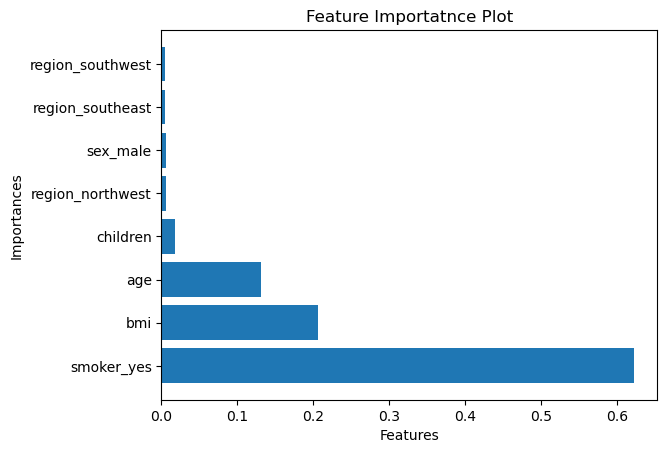

In [73]:
import matplotlib.pyplot as plt
plt.barh(df_imp['Column'], df_imp['Importance'])
plt.title('Feature Importatnce Plot')
plt.xlabel('Features')
plt.ylabel('Importances')